**Dataset:**
personality type data (Lab 2 - Personality Profile Type.csv)

**Objective:**
classify Personality type as one of the following **using RNNs**. <br>
['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
       'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ']

**Evaluation metric:**
Precision

### Import used libraries

In [1]:
import pandas as pd
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer      #to link words with similar meanings to one word.
from nltk.corpus import stopwords            #to filterout useless data
stopword = set(stopwords.words('english'))
import emoji
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', 500)

### Load Dataset

In [2]:
df = pd.read_csv("Lab 2 - Personality Profile Type.csv")
df.head(10)

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments https://www.youtube.com/watch?v=iz7lE1g4XM4 sportscenter not top ten plays https://www.youtube.com/watch?v=uCdfze1etec pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8 http://www.youtube.com/watch?v=u8ejam5DP3E On repeat for most of today.|||May the PerC Experience immerse you.|||The last ...
1,ENTP,'I'm finding the lack of me in these posts very alarming.|||Sex can be boring if it's in the same position often. For example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary. There isn't enough...|||Giving new meaning to 'Game' theory.|||Hello *ENTP Grin* That's all it takes. Than we converse and they do most of the flirting while I acknowledge their presence and return their words with smooth wordplay and more cheeky grins.|||This...
2,INTP,"'Good one _____ https://www.youtube.com/watch?v=fHiGbolFFGw|||Of course, to which I say I know; that's my blessing and my curse.|||Does being absolutely positive that you and your best friend could be an amazing couple count? If so, than yes. Or it's more I could be madly in love in case I reconciled my feelings (which at...|||No, I didn't; thank you for a link!|||So-called Ti-Si loop (and it can stem from any current topic/obsession) can be deadly. It's like when you're stuck in your o..."
3,INTJ,"'Dear INTP, I enjoyed our conversation the other day. Esoteric gabbing about the nature of the universe and the idea that every rule and social code being arbitrary constructs created...|||Dear ENTJ sub, Long time no see. Sincerely, Alpha|||None of them. All other types hurt in deep existential ways that I want no part of.|||Probably a sliding scale that depends on individual preferences, like everything in humanity.|||Draco Malfoy also. I'd say he's either 358 or 368.|||I'm either 358..."
4,ENTJ,'You're fired.|||That's another silly misconception. That approaching is logically is going to be the key to unlocking whatever it is you think you are entitled to. Nobody wants to be approached with BS...|||But guys... he REALLY wants to go on a super-duper-long-ass vacation. C'mon guys. His boss just doesn't listen or get it. He even approached him logically and everything.|||Never mind. Just go on permanent vacation.|||Two months? I wouldn't be crazy about the idea. If you are really hi...
5,INTJ,"'18/37 @.@|||Science is not perfect. No scientist claims that it is, or that scientific information will not be revised as we discover new things. Rational thinking has been very useful to our society....|||INFP- Edgar Allen Poe was an INFP and he's in your siggy.|||People see the obvious Fi and are quick to put her as INFP. I agree that she has no Ne. I see her as an ISFP. Compare her to Haku (definite INFP). She is flat through most of Naruto.. but I don't...|||Lets get this party star..."
6,INFJ,"'No, I can't draw on my own nails (haha). Those were done by professionals on my nails. And yes, those are all gel. You mean those you posted were done by yourself on your own nails? Awesome!|||Probably the Electronic Screen Syndrome. With the advent of technology and social media, we all suffer from overstimulation on a daily basis. I'm guilty as well. In the past, I can be happy just...|||I love nail arts too! These are some of mine: 718282 718290 718298 718306 718314|||This is the first..."
7,INTJ,"'I tend to build up a collection of things on my desktop that i use frequently and then move them into a folder called 'Everything' from there it get sorted into type and sub type|||i ike to collect odd objects, even at work...a lot of people would call it junk but i like to collect it. Old unused software? ill take that off your hands :) i have a bunch of old adobe...|||i think its quite normal, i tend to only see my friends in real life every c

### Data splitting

In [3]:
x = df['posts']
y = df['type']

In [4]:
# Split data into train and test sets with stratified sampling
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# Further split the training data into training and validation sets with stratified sampling
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

# Print the shapes of the datasets
print("Training data shape:", x_train.shape)
print("Validation data shape:", x_val.shape)
print("Test data shape:", x_test.shape)


Training data shape: (5552,)
Validation data shape: (1388,)
Test data shape: (1735,)


### EDA on training data

- check NaNs

In [5]:
x_train.isna().sum()

0

- check duplicates

In [6]:
x_train.duplicated().sum()

0

- show a representative sample of data texts to find out required preprocessing steps

In [7]:
sample_texts = x_train.sample(frac=0.1, random_state=42)
for text in sample_texts:
    print(text[:1000])
    print('_' * 100)

'My memory of an ESFJ. He is a back sword of love and hate. He takes care of his appearances very well for a single guy staying home alone (most guy I know staying home alone at his age appear dingy)...|||Lmaooo.. My ESFJ buddy is technology behind. I think ESFJ won't even bother to take the test.|||Lately I've been dealing with a male ESFJ who has some traits you mentioned. I wish any ESFJ would explain to me why are these happen .. Yes, he picking on people about appearances, my parents, my...|||question for INTP, Do you think being banned such a fun thing ? Like the cool thing.. :)  I read that INTP loves to explore in gaming, computer software hardware, technology nerd etc, thus forum is...|||well done entertaining ENTP *throws paper to trash can* <-- where I wrote my question.|||I'll go with Loki is an ENTJ over INFJ or INTJ, who else ? :)|||I've been guessed to be an ISFP lol O.o I never thought I am one. I took several quiz , 1 result was ISFP, other were INFJ, INTJ or INFP. I t

- check dataset balancing

In [8]:
y_train.value_counts()

INFP    1173
INFJ     941
INTP     834
INTJ     698
ENTP     438
ENFP     432
ISTP     216
ISFP     174
ENTJ     148
ISTJ     131
ENFJ     122
ISFJ     106
ESTP      57
ESFP      30
ESFJ      27
ESTJ      25
Name: type, dtype: int64

- Cleaning and Preprocessing are:
    - 1
    - 2
    - 3
    - ... etc.

### Cleaning and Preprocessing

In [9]:
def clean_text(text):
        #text = self.remove_emojis(text)
        
        text = str(text).lower()
        
        text = re.sub('\[.*?\]', '', text)  # remove what is between square brackets
        text = re.sub('https?://\S+|www\.\S+', '', text)  # remove any website
        text = re.sub('<.*?>+', '', text)  # replace any html tags
        
        text = re.sub(r"@\w+|\#", '', text)  # remove @ and any characters after it and #
        text = re.sub(r"[^\w\s]", '', text)  # remove any not word character or not a white space
        
        text = re.sub('[%s]' % re.escape(string.punctuation), '', text)  # remove punctuation
        text = text.replace('\n', '').replace('\t', '')  # remove new line and tab
        text = re.sub('\w*\d\w*', '', text)  # remove any words that contain digits
        text = re.sub(r'[^a-zA-Z\s]', '', text)  # remove special characters

        tweet_tokens = word_tokenize(text)
        filtered_tweets = [w for w in tweet_tokens if not w in stopword]

        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(word) for word in filtered_tweets]

        return " ".join(tokens)

In [10]:
x_train = x_train.apply(clean_text)
x_test = x_test.apply(clean_text)
x_val = x_val.apply(clean_text)

In [11]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit LabelEncoder on training labels and transform them
y_train_encoded = label_encoder.fit_transform(y_train)

# Transform validation and test labels using the fitted LabelEncoder
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

**You  are doing Great so far!**

### Modelling

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense , LSTM

In [13]:
# Tokenize text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

# Convert text data to sequences
x_train_seq = tokenizer.texts_to_sequences(x_train)
x_val_seq = tokenizer.texts_to_sequences(x_val)
x_test_seq = tokenizer.texts_to_sequences(x_test)

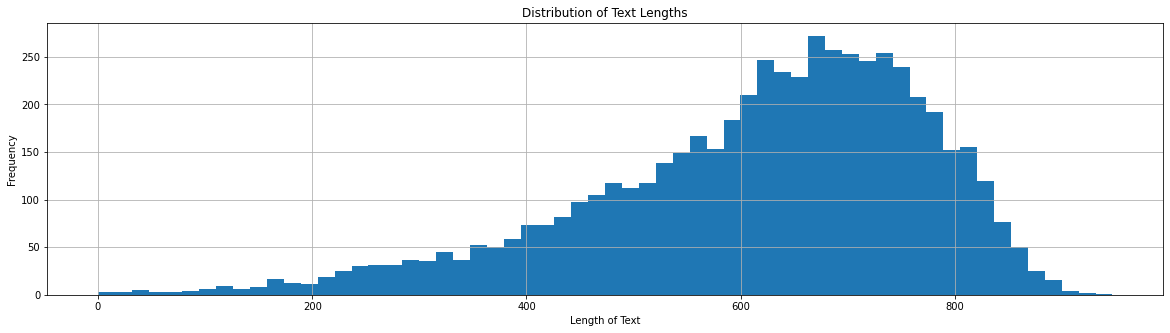

In [14]:
def len_dist(seq):
    lengths = [len(s) for s in seq]
    plt.figure(figsize=(20,5))
    plt.hist(lengths , bins=60)
    plt.title('Distribution of Text Lengths')
    plt.xlabel('Length of Text')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Assuming 'texts' is a list of text data
len_dist(x_train_seq)


In [15]:
max_length = max(len(seq) for seq in x_train_seq)
max_length

947

In [16]:
# we can take just 910
#max_length = 910
x_train_padseq = pad_sequences(x_train_seq, maxlen=max_length, padding='post')

In [17]:
len(x_train_padseq[0])

947

In [18]:
x_val_padseq = pad_sequences(x_val_seq, maxlen=max_length, padding='post')

In [19]:
x_test_padseq = pad_sequences(x_test_seq, maxlen=max_length, padding='post')

In [21]:
VOCAB_SIZE = len(tokenizer.word_index) + 1
VOCAB_SIZE

209587

In [70]:
model = tf.keras.models.Sequential([    
    tf.keras.layers.Embedding(VOCAB_SIZE, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),#, return_sequences=True
    #tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(y_train.unique()), activation='softmax')
])

In [71]:
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [72]:
history = model.fit(x_train_padseq, y_train_encoded, epochs=5, batch_size=128,
                    validation_data=(x_val_padseq, y_val_encoded), )

Epoch 1/5
44/44 [==============================] - 15s 270ms/step - loss: 2.3949 - accuracy: 0.1990 - val_loss: 2.2849 - val_accuracy: 0.2111
Epoch 2/5
44/44 [==============================] - 11s 260ms/step - loss: 2.2782 - accuracy: 0.2113 - val_loss: 2.2737 - val_accuracy: 0.2233
Epoch 3/5
44/44 [==============================] - 12s 264ms/step - loss: 2.1858 - accuracy: 0.3021 - val_loss: 2.2905 - val_accuracy: 0.2039
Epoch 4/5
44/44 [==============================] - 11s 261ms/step - loss: 1.7685 - accuracy: 0.5031 - val_loss: 2.3964 - val_accuracy: 0.2406
Epoch 5/5
44/44 [==============================] - 12s 264ms/step - loss: 1.1883 - accuracy: 0.6412 - val_loss: 2.7058 - val_accuracy: 0.2248


In [73]:
# # Evaluate the model on the test set
# test_loss, test_accuracy = model.evaluate(x_test_padseq, y_test_encoded)
# #test_loss, test_accuracy = model.evaluate(x_train_padseq, y_train_encoded)
# print("Test Loss:", test_loss)
# print("Test Accuracy:", test_accuracy)

In [74]:
# # Plot training & validation loss
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Validation'], loc='upper left')
# plt.show()

#### Evaluation

**Evaluation metric:**
Precision

In [75]:
from sklearn.metrics import precision_score

predictions = model.predict(x_test_padseq)

predictions

55/55 [==============================] - 3s 38ms/step


array([[0.01385934, 0.00527454, 0.02759093, ..., 0.01369452, 0.00962971,
        0.04422448],
       [0.020857  , 0.04715104, 0.02989711, ..., 0.02798185, 0.01181235,
        0.0745951 ],
       [0.01089067, 0.02783561, 0.02457275, ..., 0.01846604, 0.00604706,
        0.04888775],
       ...,
       [0.03703644, 0.3040711 , 0.00566188, ..., 0.01121443, 0.01644109,
        0.01342184],
       [0.03874443, 0.24824958, 0.00518593, ..., 0.00811794, 0.01304399,
        0.01966407],
       [0.02262386, 0.14897309, 0.01093164, ..., 0.01465636, 0.00809577,
        0.03412553]], dtype=float32)

In [91]:
import numpy as np
from sklearn.metrics import precision_score

predicted_classes = np.argmax(predictions, axis=1)

# Calculate precision
precision = precision_score(y_test_encoded, predicted_classes , average='micro')

print("Precision:", precision)


Precision: 0.23746397694524496


### Enhancement

### Conclusion and final results


#### Done!